# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as smf
import seaborn as sns
import statsmodels.formula.api as smf

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [31]:
# Importing the file porter_data_1.csv
df = pd.read_csv("F:\AKSHATA\DS78\Delivery_Starter\porter_data_1.csv")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\Admin\AppData\Local\Temp\ipykernel_13448\2598364626.py:2: SyntaxWarning: invalid escape sequence '\A'
  df = pd.read_csv("F:\AKSHATA\DS78\Delivery_Starter\porter_data_1.csv")


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20


## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [33]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
type(df.created_at[0])
df['created_at']=pd.to_datetime(df['created_at'])
df['actual_delivery_time']=pd.to_datetime(df['actual_delivery_time'])
#dataset.head()
type(df.created_at[0])
type(df.actual_delivery_time[0])


pandas._libs.tslibs.timestamps.Timestamp

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [ ]:
# Convert categorical features to category type

#like day of the wee should properly get encoded 

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [37]:
# Calculate time taken in minutes
df['time_taken']=df['actual_delivery_time'] - df['created_at']
df.head()


,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,0 days 00:47:00
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,0 days 00:44:00
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,0 days 00:55:00
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,0 days 00:59:00
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,0 days 00:46:00


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype          
---  ------                    --------------   -----          
 0   market_id                 175777 non-null  float64        
 1   created_at                175777 non-null  datetime64[ns] 
 2   actual_delivery_time      175777 non-null  datetime64[ns] 
 3   store_primary_category    175777 non-null  int64          
 4   order_protocol            175777 non-null  float64        
 5   total_items               175777 non-null  int64          
 6   subtotal                  175777 non-null  int64          
 7   num_distinct_items        175777 non-null  int64          
 8   min_item_price            175777 non-null  int64          
 9   max_item_price            175777 non-null  int64          
 10  total_onshift_dashers     175777 non-null  float64        
 11  total_busy_dashers        175777 non-null  float64  

In [41]:
df['time_taken_mins']=pd.to_timedelta(df['time_taken'])/pd.Timedelta('60s')

In [43]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,time_taken_mins
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,0 days 00:47:00,47.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,0 days 00:44:00,44.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,0 days 00:55:00,55.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,0 days 00:59:00,59.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,0 days 00:46:00,46.0


##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [45]:
# Extract the hour and day of week from the 'created_at' timestamp

df['hour']=df['created_at'].dt.hour
df['day']=df['created_at'].dt.dayofweek




In [57]:
# Extract day of the week (Monday=0, Sunday=6)
# Create a categorical feature 'isWeekend'
df['isWeekend'] = df['day'].dt.dayofweek
df['isWeekend'] = df['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

print(df)

AttributeError: Can only use .dt accessor with datetimelike values

In [47]:
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken,time_taken_mins,hour,day
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,0 days 00:47:00,47.0,22,4
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,0 days 00:44:00,44.0,21,1
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,0 days 00:55:00,55.0,0,0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,0 days 00:59:00,59.0,3,3
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,0 days 00:46:00,46.0,2,1


In [49]:
# Drop unnecessary columns
df.drop(['time_taken','created_at','actual_delivery_time'],axis=1,inplace=True)

In [51]:
df.head()

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,distance,time_taken_mins,hour,day
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,34.44,47.0,22,4
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,27.60,44.0,21,1
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,11.56,55.0,0,0
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,31.80,59.0,3,3
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,8.20,46.0,2,1


#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [61]:
# Define target variable (y) and features (X)



##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [ ]:
# Split data into training and testing sets



## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [ ]:
# Plot distributions for all numerical columns



##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [ ]:
# Distribution of time_taken



#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

<Axes: xlabel='time_taken_mins', ylabel='subtotal'>

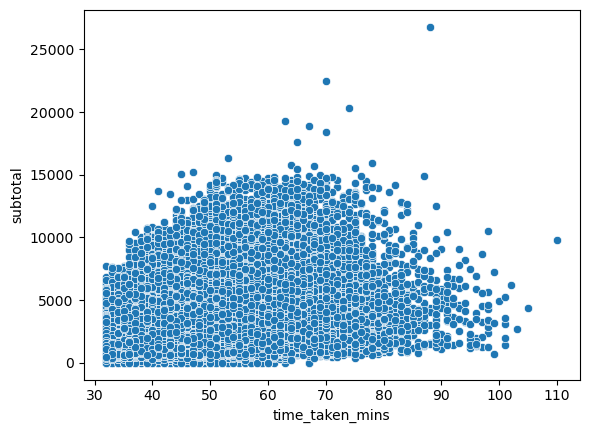

In [63]:
# Scatter plot to visualise the relationship between time_taken and other features

sns.scatterplot(x='time_taken_mins',y='subtotal',data=df)

<Axes: xlabel='total_items', ylabel='subtotal'>

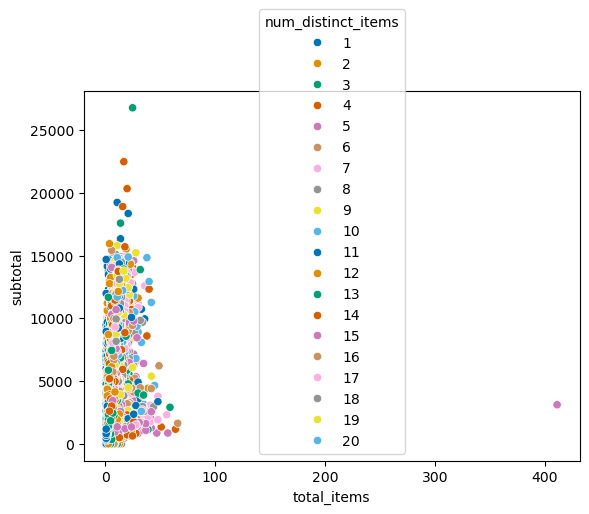

In [65]:
# Show the distribution of time_taken for different hours

sns.scatterplot(x='total_items',y='subtotal',hue='num_distinct_items',palette='colorblind',data=df)

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

In [67]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1=LocalOutlierFactor()
#model1.fit(df)
df['lof_anomaly_score']=model1.fit_predict(df)

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

<Axes: >

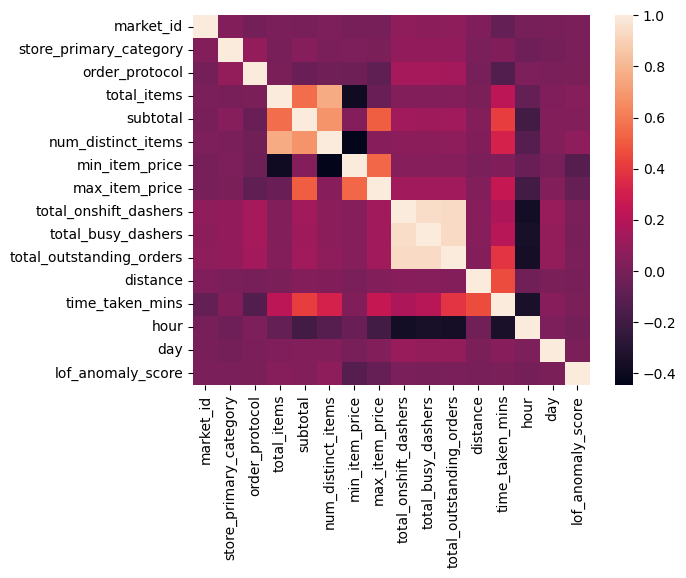

In [69]:
# Plot the heatmap of the correlation matrix

sns.heatmap(df.corr())

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [71]:
# Drop 3-5 weakly correlated columns from training dataset

from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
model1=LocalOutlierFactor()
#model1.fit(df)
df['lof_anomaly_score']=model1.fit_predict(df)

C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [79]:
df.drop(['lof_anomaly_score'],axis=1,inplace=True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174209 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 174209 non-null  float64
 1   store_primary_category    174209 non-null  int64  
 2   order_protocol            174209 non-null  float64
 3   total_items               174209 non-null  int64  
 4   subtotal                  174209 non-null  int64  
 5   num_distinct_items        174209 non-null  int64  
 6   min_item_price            174209 non-null  int64  
 7   max_item_price            174209 non-null  int64  
 8   total_onshift_dashers     174209 non-null  float64
 9   total_busy_dashers        174209 non-null  float64
 10  total_outstanding_orders  174209 non-null  float64
 11  distance                  174209 non-null  float64
 12  time_taken_mins           174209 non-null  float64
 13  hour                      174209 non-null  int32 

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

In [75]:
# Boxplot for time_taken
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174209 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 174209 non-null  float64
 1   store_primary_category    174209 non-null  int64  
 2   order_protocol            174209 non-null  float64
 3   total_items               174209 non-null  int64  
 4   subtotal                  174209 non-null  int64  
 5   num_distinct_items        174209 non-null  int64  
 6   min_item_price            174209 non-null  int64  
 7   max_item_price            174209 non-null  int64  
 8   total_onshift_dashers     174209 non-null  float64
 9   total_busy_dashers        174209 non-null  float64
 10  total_outstanding_orders  174209 non-null  float64
 11  distance                  174209 non-null  float64
 12  time_taken_mins           174209 non-null  float64
 13  hour                      174209 non-null  int32 

<Axes: >

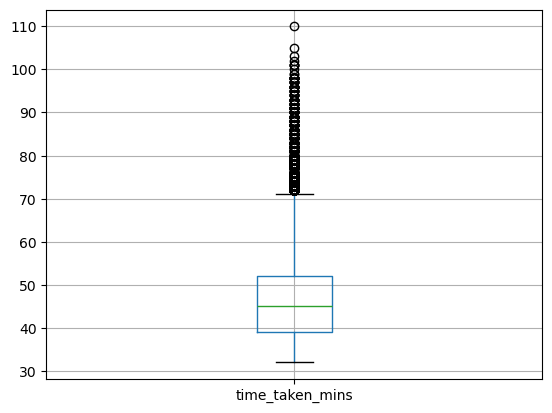

In [77]:
df.boxplot(column= ['time_taken_mins'])

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [73]:
# Handle outliers

print("number of outliers : ",(len(df.loc[(df['lof_anomaly_score'] == -1)])))
df=df.loc[(df['lof_anomaly_score'] == 1)]

number of outliers :  1568


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [ ]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [5]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [ ]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [9]:
# Distribution of time_taken

df.distplot(column= ['time_taken_mins'])

NameError: name 'df' is not defined

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [ ]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [ ]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [83]:
# Import libraries
import statsmodels as smf


#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [91]:
# Apply scaling to the numerical columns
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 174209 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 174209 non-null  float64
 1   store_primary_category    174209 non-null  int64  
 2   order_protocol            174209 non-null  float64
 3   total_items               174209 non-null  int64  
 4   subtotal                  174209 non-null  int64  
 5   num_distinct_items        174209 non-null  int64  
 6   min_item_price            174209 non-null  int64  
 7   max_item_price            174209 non-null  int64  
 8   total_onshift_dashers     174209 non-null  float64
 9   total_busy_dashers        174209 non-null  float64
 10  total_outstanding_orders  174209 non-null  float64
 11  distance                  174209 non-null  float64
 12  time_taken_mins           174209 non-null  float64
 13  hour                      174209 non-null  int32 

In [106]:
X=df.iloc[:,1:]
y=df.iloc[:,1]

In [108]:
from sklearn.preprocessing import MinMaxScaler as ms
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [ ]:
# Create/Initialise the model


In [110]:
# Train the model using the training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=0)

In [112]:
X_train.shape

(121946, 14)

In [114]:
y_train.shape

(121946,)

In [116]:
# Make predictions
y_train.shape

(121946,)

In [118]:
# Find results for evaluation metrics

#model building using Multiple regression
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
mlr.fit(X_train,y_train)

LinearRegression()

In [120]:
y_pred=mlr.predict(X_test)
y_pred

array([ 4.60000000e+01,  5.00000000e+01,  5.50000000e+01, ...,
       -1.64055875e-11,  5.80000000e+01,  5.40000000e+01])

In [122]:
y_test.values

array([46, 50, 55, ...,  0, 58, 54], dtype=int64)

In [124]:
#Comparing Actual and predicted Values
Result=pd.DataFrame({'Actual Values':y_test,'Predicted Values':y_pred})
Result

,Actual Values,Predicted Values
15801,46,4.600000e+01
112840,50,5.000000e+01
143321,55,5.500000e+01
74640,20,2.000000e+01
14042,65,6.500000e+01
...,...,...
12828,4,4.000000e+00
171510,58,5.800000e+01
54333,0,-1.640559e-11
42241,58,5.800000e+01


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [ ]:
# Loop through the number of features and test the model



In [ ]:
# Build the final model with selected number of features



## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [ ]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram



[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model



Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'



Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>from Heat map we see that there is no relation between delivey time and other featurs 



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear regression is one of the simplest and most widely used algorithms in statistics and machine learning. It models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.
Equation of a Line: In simple linear regression (one independent variable), the relationship is represented by the equation:
>Y = b0 + b1*X
>where:
Y is the dependent variable (predicted output).
X is the independent variable (input feature).
b0 is the y-intercept (the value of Y when X is 0).
b1 is the slope of the line (how much Y changes for each unit change in X).
For multiple linear regression (multiple independent variables), the equation extends to:
> Y = b0 + b1*X1 + b2*X2 + ... + bn*Xn
>



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Simple linear regression and multiple linear regression are both statistical methods used to model the relationship between variables. The key difference lies in the number of independent (predictor) variables used. Simple linear regression uses only one independent variable, while multiple linear regression uses two or more. 



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>The cost function measures how well the model’s predictions match the actual data and guides the optimization of parameters to minimize errors and find the best fit.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting: Training error is low, but testing error is significantly higher.overfit models experience high variance—they give accurate results for the training set but not for the test set. More model training results in less bias but variance can increase
>
>Underfitting: Errors are consistently high across training and testing data sets. Underfit models experience high bias—they give inaccurate results for both the training data and test set.




---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual plots are crucial for diagnosing linear regression models as they visually assess the model's assumptions about the data. By plotting residuals (the difference between observed and predicted values) against predicted values or independent variables, these plots help identify if the model is a good fit and if its assumptions are met. 